In [215]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Set tables reading options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 128)

year = 2018

# Files
players_names = "_Data/Predictions/stats_players_{}_weight06.csv".format(year)
predicted_probas = "_Data/Predictions/players_rounds_predictions_{}.csv".format(year)

# Read the csv files
players_df = pd.read_csv(players_names, header=0, index_col=0)
df = pd.read_csv(predicted_probas, names = ["Winner%", "Final%", "SF%", "QF%", 'R16%', 'R32%', 'R64%'])
df.index = range(1, len(df)+1)

# Concat names and probas
players_df = players_df.iloc[:,[0,4]]
new_df = pd.concat([players_df, df], axis=1)
new_df

,Name,rank,Winner%,Final%,SF%,QF%,R16%,R32%,R64%
1,Rafael Nadal,2.0,0.168348,0.244677,0.343654,0.457791,0.601164,0.737425,0.860593
2,Alexander Zverev,3.0,0.059099,0.105968,0.176298,0.274825,0.420225,0.584008,0.767544
3,Marin Cilic,5.0,0.047534,0.087513,0.152870,0.256179,0.404403,0.573337,0.762050
4,Grigor Dimitrov,4.0,0.028501,0.055559,0.106667,0.193960,0.331789,0.505199,0.715534
5,Juan Martin Del Potro,6.0,0.062997,0.107018,0.182174,0.276446,0.421252,0.585982,0.769383
6,Kevin Anderson,7.0,0.019904,0.040994,0.084603,0.152203,0.275996,0.449050,0.675951
7,Dominic Thiem,8.0,0.033506,0.062686,0.107826,0.201025,0.337549,0.508680,0.717286
8,David Goffin,10.0,0.018329,0.037631,0.071396,0.148547,0.273278,0.445074,0.672347
9,John Isner,10.0,0.021536,0.042099,0.079300,0.150831,0.251742,0.436283,0.665060
10,Pablo Carreno Busta,11.0,0.008817,0.020099,0.044080,0.097505,0.183836,0.369229,0.614060


In [216]:
# Sort by highest probabilities for Winner
winner_df = new_df.sort_values(by=['Winner%'], ascending=False)
winner_df = winner_df.iloc[:,[0,1,2]]
winner_df

,Name,rank,Winner%
1,Rafael Nadal,2.0,0.168348
20,Novak Djokovic,18.0,0.068938
5,Juan Martin Del Potro,6.0,0.062997
2,Alexander Zverev,3.0,0.059099
3,Marin Cilic,5.0,0.047534
7,Dominic Thiem,8.0,0.033506
4,Grigor Dimitrov,4.0,0.028501
19,Kei Nishikori,24.0,0.023989
119,Peter Gojowczyk,49.0,0.022521
9,John Isner,10.0,0.021536


In [217]:
# Sort by highest probabilities for Final
final_df = new_df.sort_values(by=['Final%'], ascending=False)
final_df = final_df.iloc[:,[0,1,3]]
final_df

,Name,rank,Final%
1,Rafael Nadal,2.0,0.244677
20,Novak Djokovic,18.0,0.108393
5,Juan Martin Del Potro,6.0,0.107018
2,Alexander Zverev,3.0,0.105968
3,Marin Cilic,5.0,0.087513
7,Dominic Thiem,8.0,0.062686
4,Grigor Dimitrov,4.0,0.055559
19,Kei Nishikori,24.0,0.045343
119,Peter Gojowczyk,49.0,0.044687
9,John Isner,10.0,0.042099


In [218]:
# Sort by highest probabilities for SF
SF_df = new_df.sort_values(by=['SF%'], ascending=False)
SF_df = SF_df.iloc[:,[0,1,4]]
SF_df

,Name,rank,SF%
1,Rafael Nadal,2.0,0.343654
5,Juan Martin Del Potro,6.0,0.182174
2,Alexander Zverev,3.0,0.176298
20,Novak Djokovic,18.0,0.166919
3,Marin Cilic,5.0,0.152870
7,Dominic Thiem,8.0,0.107826
4,Grigor Dimitrov,4.0,0.106667
6,Kevin Anderson,7.0,0.084603
119,Peter Gojowczyk,49.0,0.083942
19,Kei Nishikori,24.0,0.083526


In [219]:
# Sort by highest probabilities for QF
QF_df = new_df.sort_values(by=['QF%'], ascending=False)
QF_df = QF_df.iloc[:,[0,1,5]]
QF_df

,Name,rank,QF%
1,Rafael Nadal,2.0,0.457791
5,Juan Martin Del Potro,6.0,0.276446
2,Alexander Zverev,3.0,0.274825
3,Marin Cilic,5.0,0.256179
20,Novak Djokovic,18.0,0.251678
7,Dominic Thiem,8.0,0.201025
4,Grigor Dimitrov,4.0,0.193960
6,Kevin Anderson,7.0,0.152203
9,John Isner,10.0,0.150831
19,Kei Nishikori,24.0,0.149550


In [220]:
# Sort by highest probabilities for R16
R16_df = new_df.sort_values(by=['R16%'], ascending=False)
R16_df = R16_df.iloc[:,[0,1,6]]
R16_df

,Name,rank,R16%
1,Rafael Nadal,2.0,0.601164
5,Juan Martin Del Potro,6.0,0.421252
2,Alexander Zverev,3.0,0.420225
3,Marin Cilic,5.0,0.404403
20,Novak Djokovic,18.0,0.385447
7,Dominic Thiem,8.0,0.337549
4,Grigor Dimitrov,4.0,0.331789
6,Kevin Anderson,7.0,0.275996
8,David Goffin,10.0,0.273278
19,Kei Nishikori,24.0,0.264954


In [221]:
# Sort by highest probabilities for R32
R32_df = new_df.sort_values(by=['R32%'], ascending=False)
R32_df = R32_df.iloc[:,[0,1,7]]
R32_df

,Name,rank,R32%
1,Rafael Nadal,2.0,0.737425
5,Juan Martin Del Potro,6.0,0.585982
2,Alexander Zverev,3.0,0.584008
3,Marin Cilic,5.0,0.573337
20,Novak Djokovic,18.0,0.532109
7,Dominic Thiem,8.0,0.508680
4,Grigor Dimitrov,4.0,0.505199
6,Kevin Anderson,7.0,0.449050
8,David Goffin,10.0,0.445074
9,John Isner,10.0,0.436283


In [222]:
# Sort by highest probabilities for R64
R64_df = new_df.sort_values(by=['R64%'], ascending=False)
R64_df = R64_df.iloc[:,[0,1,8]]
R64_df

,Name,rank,R64%
1,Rafael Nadal,2.0,0.860593
5,Juan Martin Del Potro,6.0,0.769383
2,Alexander Zverev,3.0,0.767544
3,Marin Cilic,5.0,0.762050
20,Novak Djokovic,18.0,0.733976
7,Dominic Thiem,8.0,0.717286
4,Grigor Dimitrov,4.0,0.715534
6,Kevin Anderson,7.0,0.675951
8,David Goffin,10.0,0.672347
13,Roberto Bautista Agut,14.0,0.665240


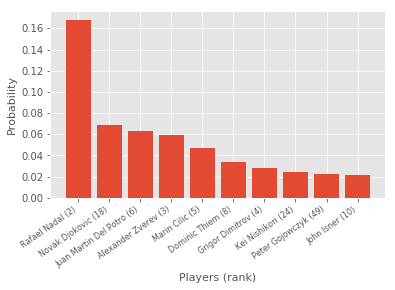

In [223]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR WINNER
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = winner_df.iloc[:nb_players, 0].tolist()
ranks = winner_df.iloc[:nb_players, 1].tolist()
probas = winner_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_winner.eps".format(year), bbox_inches = "tight")

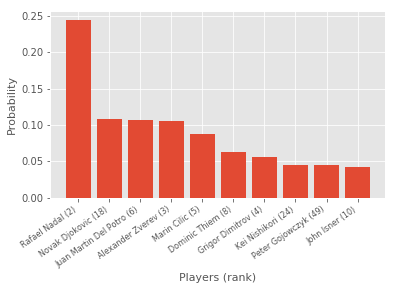

In [224]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR FINAL
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = final_df.iloc[:nb_players, 0].tolist()
ranks = final_df.iloc[:nb_players, 1].tolist()
probas = final_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_final.eps".format(year), bbox_inches = "tight")

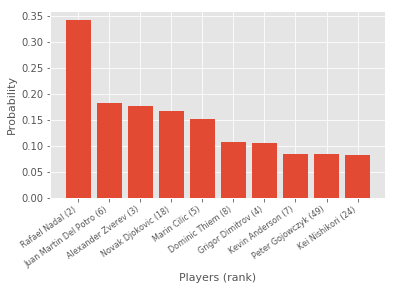

In [225]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR SF
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = SF_df.iloc[:nb_players, 0].tolist()
ranks = SF_df.iloc[:nb_players, 1].tolist()
probas = SF_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_SF.eps".format(year), bbox_inches = "tight")

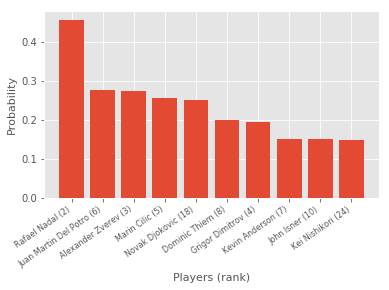

In [226]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR QF
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = QF_df.iloc[:nb_players, 0].tolist()
ranks = QF_df.iloc[:nb_players, 1].tolist()
probas = QF_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_QF.eps".format(year), bbox_inches = "tight")

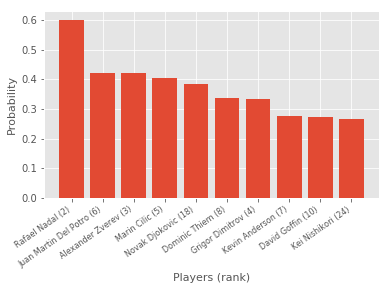

In [227]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR R16
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = R16_df.iloc[:nb_players, 0].tolist()
ranks = R16_df.iloc[:nb_players, 1].tolist()
probas = R16_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_R16.eps".format(year), bbox_inches = "tight")

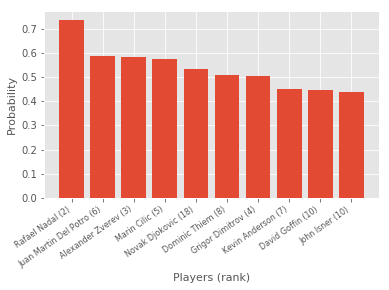

In [228]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR R32
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = R32_df.iloc[:nb_players, 0].tolist()
ranks = R32_df.iloc[:nb_players, 1].tolist()
probas = R32_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_R32.eps".format(year), bbox_inches = "tight")

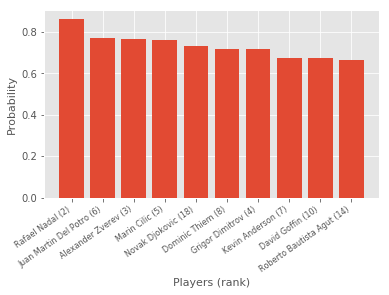

In [229]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR R64
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = R64_df.iloc[:nb_players, 0].tolist()
ranks = R64_df.iloc[:nb_players, 1].tolist()
probas = R64_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure()
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_R64.eps".format(year), bbox_inches = "tight")